# Trasformazioni affini e non affini

Trasformazioni geometriche elementari

- rotazioni
- resizing/scaling
- cropping
- traslazioni

In [1]:
# import delle librerie
import os
import numpy as np
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms

from io import BytesIO
import IPython.display

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = 'data'
# print(f'workin dir is {os.path.abspath(".")}')

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

image shape is (133, 200, 3)


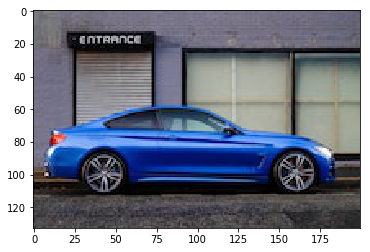

In [2]:

def plot_image(np_array):
    plt.figure()
    plt.imshow(np_array)
    plt.show()
    
img = Image.open(myResourcePath('car.jpg'))

rgb_image = np.array(img)
print(f'image shape is {rgb_image.shape}')
plot_image(rgb_image)


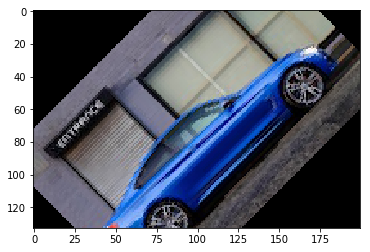

In [3]:
# Rotation
image2 = img.rotate(45)
plot_image(np.array(image2))

Per rotazioni semplici si può usare il metodo *transpose*

    transpose(method):
        Transpose image (flip or rotate in 90 degree steps)

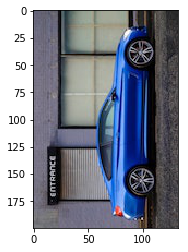

In [4]:
image2 = img.transpose(Image.ROTATE_90)
plot_image(np.array(image2))

try method FLIP_LEFT_RIGHT


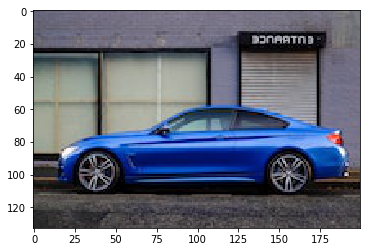

try method FLIP_TOP_BOTTOM


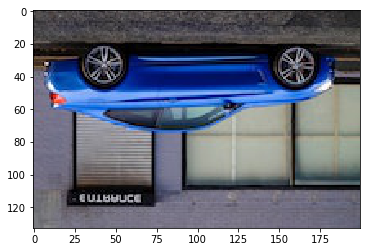

try method ROTATE_90


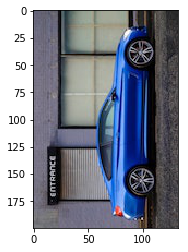

try method ROTATE_180


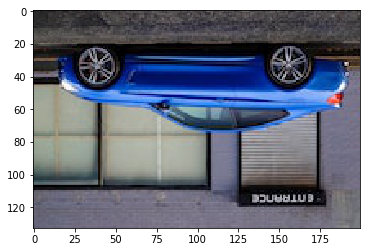

try method ROTATE_270


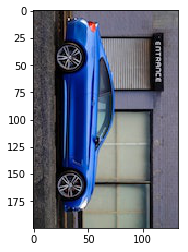

In [5]:
transpose_contants = {Image.FLIP_LEFT_RIGHT: 'FLIP_LEFT_RIGHT', 
                      Image.FLIP_TOP_BOTTOM: 'FLIP_TOP_BOTTOM', 
                      Image.ROTATE_90: 'ROTATE_90',
                      Image.ROTATE_180: 'ROTATE_180', 
                      Image.ROTATE_270: 'ROTATE_270'}
for method, name in transpose_contants.items():
    print(f'try method {name}')
    image2 = img.transpose(method)
    plot_image(np.array(image2))

current size is (200, 133)
new size is (100, 66)


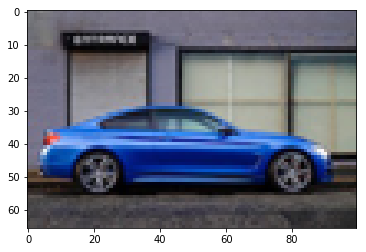

In [6]:
# Resizing

w, h = img.size
print(f'current size is {img.size}')

w2 = int(w / 2) 
h2 = int(h / 2)
image2 = img.resize((w2, h2))
print(f'new size is {image2.size}')
plot_image(np.array(image2))

current size is (200, 133)
new size is (100, 133)


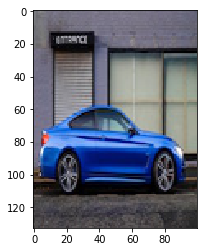

In [7]:
# Resizing 2

w, h = img.size
print(f'current size is {img.size}')

w2 = int(w / 2) 
h2 = int(h)
image2 = img.resize((w2, h2))
print(f'new size is {image2.size}')
plot_image(np.array(image2))

current size is (200, 133)
new size is (400, 266)


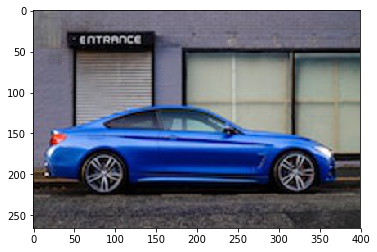

In [8]:
# Resizing 3

w, h = img.size
print(f'current size is {img.size}')

w2 = int(w * 2) 
h2 = int(h * 2)
image2 = img.resize((w2, h2))
print(f'new size is {image2.size}')
plot_image(np.array(image2))

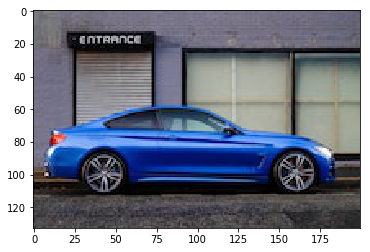

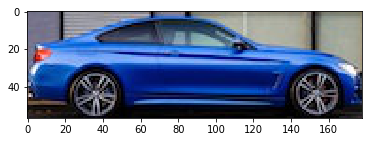

original size is (200, 133)
new size is (178, 57)


In [9]:
# cropping

(left, upper, right, lower) = (7, 55, 185, 112)

image2 = img.crop((left, upper, right, lower))

plot_image(np.array(img))
plot_image(np.array(image2))

print(f'original size is {img.size}')
print(f'new size is {image2.size}')

## Trasformazioni e pytorch
Queste trasformazioni possono essere effettuate tramite la libreria torchvision

0 -> torch.Size([3, 266, 400])


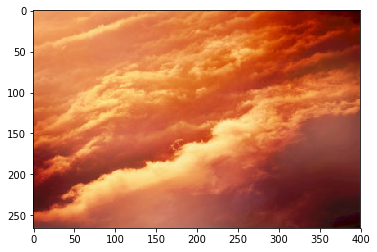

1 -> torch.Size([3, 267, 400])


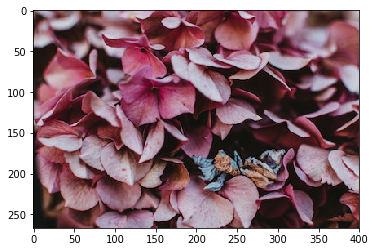

2 -> torch.Size([3, 267, 400])


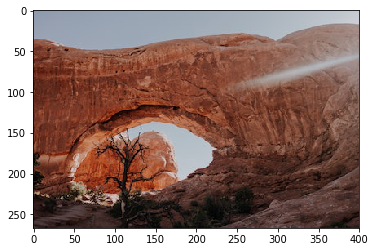

3 -> torch.Size([3, 281, 400])


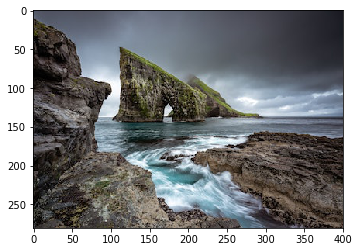

In [10]:
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import torchvision.datasets as dataset_util

IMAGE_DATASET = myResourcePath('.') # load 'data' dir

def show_tensor_image(tensor):
    plt.figure()
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

dataset = dataset_util.ImageFolder(IMAGE_DATASET, transform=transforms.ToTensor())

for i, (item, c_index) in enumerate(dataset):
    print(f'{i} -> {item.shape}')
    show_tensor_image(item)    
    

0 -> torch.Size([3, 100, 100])


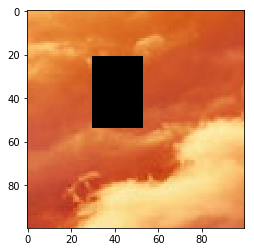

1 -> torch.Size([3, 100, 100])


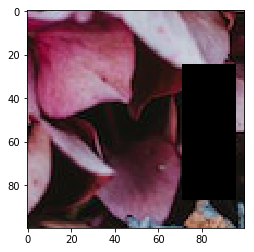

2 -> torch.Size([3, 100, 100])


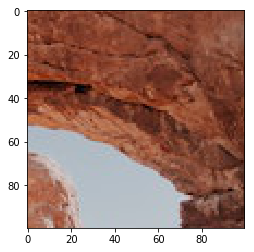

3 -> torch.Size([3, 100, 100])


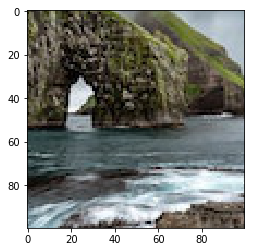

In [11]:

transformations = T.Compose([
    T.CenterCrop(100),
    T.ToTensor(),
    T.RandomErasing()
])

dataset = dataset_util.ImageFolder(IMAGE_DATASET, transform=transformations)

for i, (item, c_index) in enumerate(dataset):
    print(f'{i} -> {item.shape}')
    show_tensor_image(item)

0 -> torch.Size([3, 266, 400])


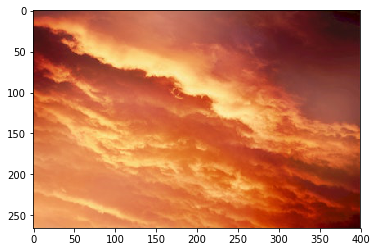

1 -> torch.Size([3, 267, 400])


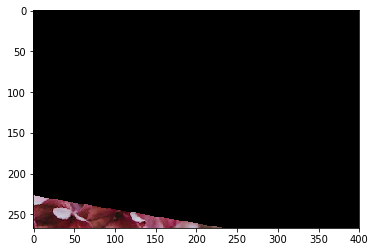

2 -> torch.Size([3, 267, 400])


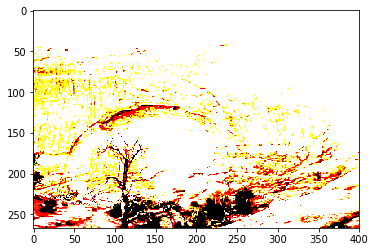

3 -> torch.Size([3, 281, 400])


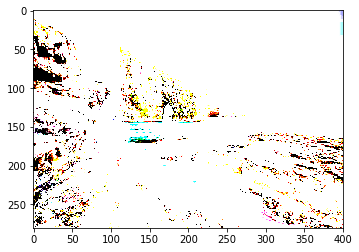

In [12]:
randomTransf = T.RandomChoice([
        T.CenterCrop(100),
        T.ColorJitter(brightness=10, contrast=10),
        T.RandomRotation(90),
        T.RandomVerticalFlip(),
        T.RandomAffine(degrees=45, translate=(0.8, 1)),
        T.RandomAffine(degrees=45, scale=(80, 100), fillcolor=(255,0,0)),
    ])

transformations = T.Compose([randomTransf, T.ToTensor()])

dataset = dataset_util.ImageFolder(IMAGE_DATASET, transform=transformations)

for i, (item, c_index) in enumerate(dataset):
    print(f'{i} -> {item.shape}')
    show_tensor_image(item)